# Simple linear regression 

In this exercise you will train a linear regression model via gradient descent in the simplest scenario, i.e. recreating an affine function.

The setup is as follows:
* we are given a set of pairs $(x, y)$, where $x$ represents the feature, and $y$ is the target,
* our hypothesis is $h(x) = ax + b$,
* we will use the dataset consisting of set of pairs to figure out the right values for $a$ and $b$,
* to do so we will optimize the loss function: $J(a,b) = \frac{1}{n}\sum_{i=1}^n (y_i - h(x_i))^2$,
* with the loss function in hand we can improve our guesses iteratively:
    * $a^{t+1} = a^t - \text{step_size} \cdot \frac{\partial J(a,b)}{\partial a}$,
    * $b^{t+1} = b^t - \text{step_size} \cdot \frac{\partial J(a,b)}{\partial b}$,
* we can end the process after some predefined number of epochs (or when the changes are no longer meaningful).

Let's start with creating the dataset.

In [ ]:
%matplotlib inline

import random

_a = 0.3
_b = 0.5

f = lambda x: _a * x + _b # ground truth
g = lambda x: f(x) + random.gauss(0, 0.02) # a noisy version of f

In [ ]:
n = 50 # number of examples

xs = [random.random() for _ in range(n)] # features
ys = list(map(g, xs)) # targets

ts = list(map(f, xs)) # we don't get to see this

Our goal is to recreate $f$. However, as reality can be harsh (and usually is) we only get to observe $g$. We observe it as a list of pairs $(x,y) \in \text{zip}(xs, ys)$.

Let's plot the data.

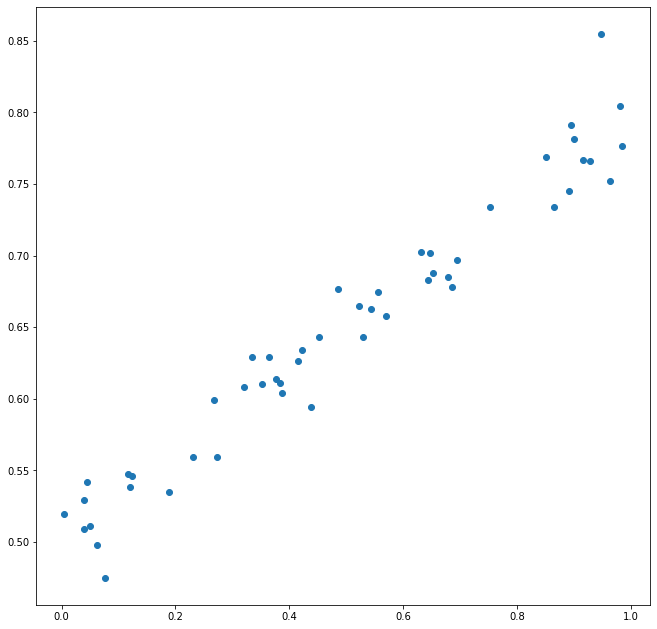

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize=(11, 11))
plt.scatter(xs, ys)

In [ ]:
def l2_loss(ys, ps):
    assert len(ys) == len(ps)
    n = len(ps)

    J = 1/n * sum([(y - p)**2 for (y,p) in zip(ys, ps)])

    return J

Please take a while to (roughly) guess the output before executing the cell below.

In [ ]:
l2_loss(ys, ts)

0.00042243046102435824

Let's now implement the algorithm

Hint: To make sure that you correctly compute the gradients, you can compute them numerically and compare the results. 

In [ ]:
import time

a = 0. # our initial guess for _a
b = 0. # our initial guess for _b
lr = 0.5 # step size

n_epochs = 40 # number of passes over the training data

def predict(a, b, xs=xs):
    return [a * x + b for x in xs]

def evaluate(a, b, xs=xs, ys=ys):
    return l2_loss(ys, predict(a, b, xs))

losses = [evaluate(a, b)]

start = time.time()

for i in range(n_epochs):
    ps = predict(a,b)
    a = a - lr * 1/len(xs)*sum([-2*x*(y - p) for (x,y,p) in zip(xs,ys,ps)])
    b = b - lr * 1/len(xs)*sum([-2*(y - p) for (y, p) in zip(ys,ps)])
    
    loss = evaluate(a, b)
    losses.append(loss)
    
    print('Iter: {:>3} Loss: {:8.8f} a: {:8.5f}, b: {:8.5f}'.format(i, loss, a, b))

end = time.time()

print('TIME: ', end - start)

Iter:   0 Loss: 0.02956252 a:  0.34556, b:  0.64721
Iter:   1 Loss: 0.00244509 a:  0.25744, b:  0.47714
Iter:   2 Loss: 0.00059160 a:  0.28238, b:  0.52051
Iter:   3 Loss: 0.00046079 a:  0.27767, b:  0.50823
Iter:   4 Loss: 0.00044801 a:  0.28057, b:  0.51055
Iter:   5 Loss: 0.00044381 a:  0.28136, b:  0.50912
Iter:   6 Loss: 0.00044066 a:  0.28259, b:  0.50873
Iter:   7 Loss: 0.00043798 a:  0.28361, b:  0.50813
Iter:   8 Loss: 0.00043568 a:  0.28458, b:  0.50763
Iter:   9 Loss: 0.00043370 a:  0.28547, b:  0.50715
Iter:  10 Loss: 0.00043199 a:  0.28631, b:  0.50671
Iter:  11 Loss: 0.00043052 a:  0.28708, b:  0.50630
Iter:  12 Loss: 0.00042925 a:  0.28779, b:  0.50592
Iter:  13 Loss: 0.00042816 a:  0.28846, b:  0.50557
Iter:  14 Loss: 0.00042722 a:  0.28907, b:  0.50524
Iter:  15 Loss: 0.00042642 a:  0.28965, b:  0.50494
Iter:  16 Loss: 0.00042572 a:  0.29018, b:  0.50466
Iter:  17 Loss: 0.00042512 a:  0.29067, b:  0.50440
Iter:  18 Loss: 0.00042461 a:  0.29112, b:  0.50415
Iter:  19 Lo

In [ ]:
# vectorized
import numpy as np

X = np.array(xs)
X = X.transpose()
X = np.c_[np.ones(X.shape[0]), X]

y = np.array(ys)
theta = np.zeros(X.shape[1])

n = X.shape[0]
alpha = 0.5
n_epochs = 40 # number of passes over the training data

def cost(theta, X=X, y=y):
  n = y.shape[0]
  return 1/n * sum((X @ theta - y)**2)


losses = [cost(theta)]

start = time.time()

for i in range(n_epochs):
  theta = theta - alpha/n * (X.transpose() @ ((X @ theta)  - y))

  loss = cost(theta)
  losses.append(loss)
  print('Iter: {:>3} Loss: {:8.8f} a: {:8.5f}, b: {:8.5f}'.format(i, loss, theta[1], theta[0]))

end = time.time()
print('TIME: ', end - start)

Iter:   0 Loss: 0.05873997 a:  0.17278, b:  0.32361
Iter:   1 Loss: 0.00842255 a:  0.23714, b:  0.44289
Iter:   2 Loss: 0.00155117 a:  0.26142, b:  0.48669
Iter:   3 Loss: 0.00061054 a:  0.27088, b:  0.50262
Iter:   4 Loss: 0.00047967 a:  0.27484, b:  0.50826
Iter:   5 Loss: 0.00045950 a:  0.27676, b:  0.51010
Iter:   6 Loss: 0.00045462 a:  0.27790, b:  0.51055
Iter:   7 Loss: 0.00045197 a:  0.27874, b:  0.51049
Iter:   8 Loss: 0.00044976 a:  0.27946, b:  0.51026
Iter:   9 Loss: 0.00044775 a:  0.28011, b:  0.50997
Iter:  10 Loss: 0.00044588 a:  0.28073, b:  0.50966
Iter:  11 Loss: 0.00044415 a:  0.28132, b:  0.50935
Iter:  12 Loss: 0.00044254 a:  0.28188, b:  0.50905
Iter:  13 Loss: 0.00044104 a:  0.28243, b:  0.50877
Iter:  14 Loss: 0.00043965 a:  0.28295, b:  0.50849
Iter:  15 Loss: 0.00043836 a:  0.28346, b:  0.50822
Iter:  16 Loss: 0.00043716 a:  0.28395, b:  0.50796
Iter:  17 Loss: 0.00043604 a:  0.28442, b:  0.50771
Iter:  18 Loss: 0.00043501 a:  0.28487, b:  0.50747
Iter:  19 Lo

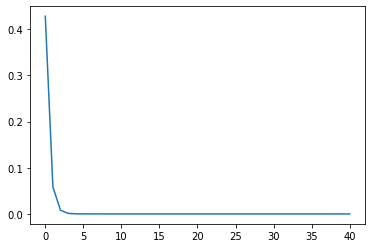

In [ ]:
plt.plot(losses)

Let's now visually asses how we do on training data

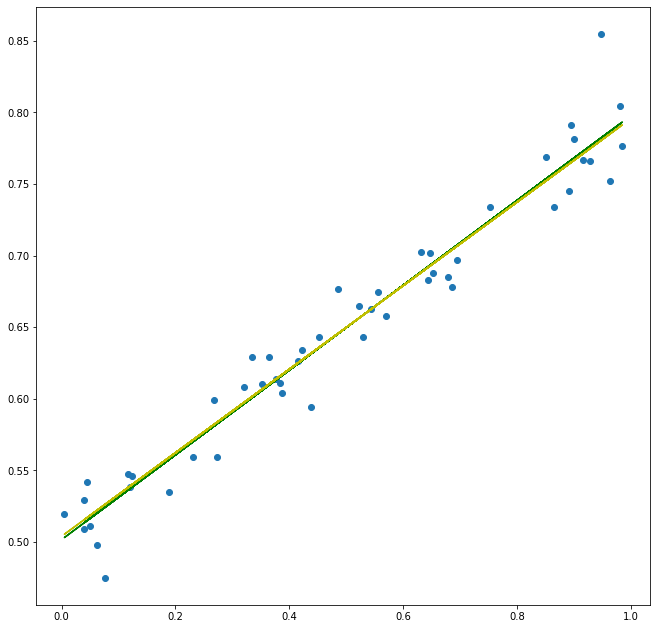

In [ ]:
fig = plt.figure(figsize=(11, 11))
plt.scatter(xs, ys)
plt.plot(xs, predict(a, b), c='g')
plt.plot(xs, X @ theta , c='y')
plt.show()

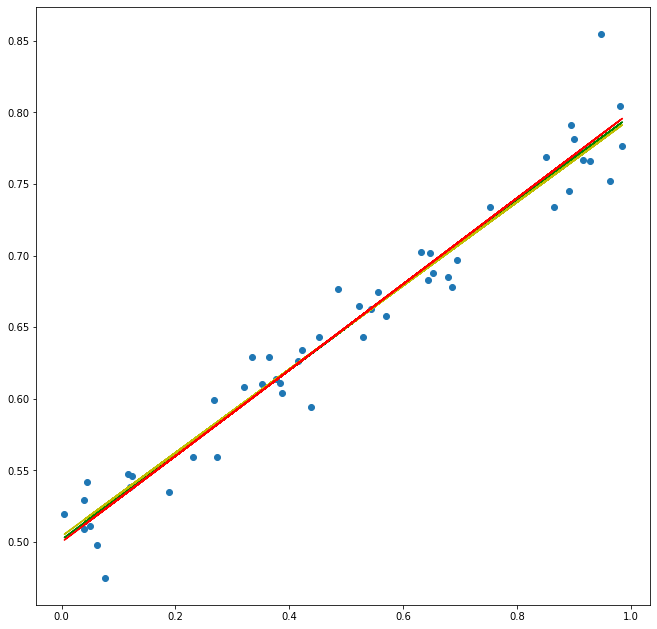

In [ ]:
fig = plt.figure(figsize=(11, 11))
plt.scatter(xs, ys)
plt.plot(xs, predict(a, b), c='g')
plt.plot(xs, X @ theta , c='y')

plt.plot(xs, ts, c='r')

plt.show()

Let's check our implementation vs. the one in sklearn

In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np

X = np.array(xs).reshape((len(xs), 1))
regr = LinearRegression()
regr.fit(X, ys) # traini

sk_a = float(regr.coef_)
sk_b = regr.intercept_
sk_loss = l2_loss(ys, regr.predict(X))

print('Loss: {:8.8f} a: {:8.5f}, b: {:8.5f}'.format(sk_loss, sk_a, sk_b))

Loss: 0.00042142 a:  0.29700, b:  0.50104
